In [109]:
!pip install kmodes
!pip install geoplotlib
!pip install ipyleaflet

!jupyter nbextension enable --py --sys-prefix ipyleaflet
%pylab inline
%matplotlib inline


import pandas as pd #
import time
import os
import numpy as np #
import matplotlib.pyplot as plt # plotting library for Python
import seaborn as sns
import matplotlib.cm
import matplotlib.colors as colors

from kmodes.kprototypes import KPrototypes
from pandas import DataFrame
from pandas import set_option
from numpy import mean, std
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from matplotlib.colors import Normalize

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from numpy import random, float
sns.set_style("darkgrid")







Populating the interactive namespace from numpy and matplotlib


Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [110]:

brewing_df = pd.read_csv (r'C:\Users\usuario\Documents\Hackathon\DATASET_HACKATHON.csv')   
#read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"


In [111]:

print (brewing_df)

      Id_Cliente id_Agencia  Frecuencia  Vol_Entrega        lat        lon
0              1         A1           1          2.0  20.506052 -98.212377
1              2         A1           1         17.0  20.458128 -98.221248
2              3         A1           1          2.0  20.530427 -98.236860
3              4         A1           3         15.0  20.488655 -98.202940
4              5         A1           1          2.0  20.533253 -98.219669
...          ...        ...         ...          ...        ...        ...
3620        3621         A1           1         15.0  20.558651 -98.149706
3621        3622         A1           1          2.0  20.541300 -98.157300
3622        3623         A1           1          6.0  20.509200 -98.128000
3623        3624         A1           1         31.0  20.513400 -98.154500
3624        3625         A1           2         18.5  20.521772 -98.166209

[3625 rows x 6 columns]


In [112]:
brewing_df = brewing_df.drop(["id_Agencia"],axis=1)

In [113]:
brewing_df

,Id_Cliente,Frecuencia,Vol_Entrega,lat,lon
0,1,1,2.0,20.506052,-98.212377
1,2,1,17.0,20.458128,-98.221248
2,3,1,2.0,20.530427,-98.236860
3,4,3,15.0,20.488655,-98.202940
4,5,1,2.0,20.533253,-98.219669
...,...,...,...,...,...
3620,3621,1,15.0,20.558651,-98.149706
3621,3622,1,2.0,20.541300,-98.157300
3622,3623,1,6.0,20.509200,-98.128000
3623,3624,1,31.0,20.513400,-98.154500


In [114]:
brewing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id_Cliente   3625 non-null   int64  
 1   Frecuencia   3625 non-null   int64  
 2   Vol_Entrega  3625 non-null   float64
 3   lat          3625 non-null   float64
 4   lon          3625 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 141.7 KB


In [115]:
brewing_df.describe()

,Id_Cliente,Frecuencia,Vol_Entrega,lat,lon
count,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000
mean,1813.000000,1.097103,13.195724,20.508669,-98.189818
std,1046.591691,0.319449,20.158246,0.034647,0.044283
min,1.000000,1.000000,0.000000,20.435038,-98.298948
25%,907.000000,1.000000,2.000000,20.480661,-98.221491
50%,1813.000000,1.000000,6.000000,20.507537,-98.183900
75%,2719.000000,1.000000,15.000000,20.537206,-98.153300
max,3625.000000,3.000000,175.000000,20.608307,-98.108122


In [116]:
for i,row in brewing_df.iterrows():
    brewing_df.loc[i,'Total_Entrega']=row['Frecuencia']*row['Vol_Entrega']

In [117]:
brewing_df_con_Vol_total = brewing_df

In [118]:
brewing_df_con_Vol_total = brewing_df.drop(["Frecuencia","Vol_Entrega"],axis=1)

In [119]:
brewing_df_con_Vol_total #only to show if we are doing the things rigth

,Id_Cliente,lat,lon,Total_Entrega
0,1,20.506052,-98.212377,2.0
1,2,20.458128,-98.221248,17.0
2,3,20.530427,-98.236860,2.0
3,4,20.488655,-98.202940,45.0
4,5,20.533253,-98.219669,2.0
...,...,...,...,...
3620,3621,20.558651,-98.149706,15.0
3621,3622,20.541300,-98.157300,2.0
3622,3623,20.509200,-98.128000,6.0
3623,3624,20.513400,-98.154500,31.0


In [120]:
#normalize the data
newdf = DataFrame(scale(brewing_df_con_Vol_total), index=brewing_df_con_Vol_total.index, columns=brewing_df_con_Vol_total.columns)

In [121]:
newdf

,Id_Cliente,lat,lon,Total_Entrega
0,-1.731573,-0.075534,-0.509502,-0.566267
1,-1.730617,-1.458921,-0.709853,0.086772
2,-1.729662,0.628081,-1.062449,-0.566267
3,-1.728706,-0.577721,-0.296368,1.305777
4,-1.727751,0.709657,-0.674192,-0.566267
...,...,...,...,...
3620,1.727751,1.442802,0.905917,-0.000300
3621,1.728706,0.941944,0.734407,-0.566267
3622,1.729662,0.015337,1.396146,-0.392123
3623,1.730617,0.136575,0.797645,0.696274


In [122]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_Cliente     3625 non-null   float64
 1   lat            3625 non-null   float64
 2   lon            3625 non-null   float64
 3   Total_Entrega  3625 non-null   float64
dtypes: float64(4)
memory usage: 113.4 KB


In [123]:
newdf.describe()

,Id_Cliente,lat,lon,Total_Entrega
count,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03
mean,6.376509e-17,5.013277e-14,6.135261e-14,2.216771e-15
std,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00
min,-1.731573e+00,-2.125443e+00,-2.464702e+00,-6.533387e-01
25%,-8.657865e-01,-8.084775e-01,-7.153414e-01,-5.662669e-01
50%,0.000000e+00,-3.266783e-02,1.336485e-01,-3.921233e-01
75%,8.657865e-01,8.237654e-01,8.247472e-01,1.303074e-01
max,1.731573e+00,2.876186e+00,1.845089e+00,6.965444e+00


In [124]:
kproto = KPrototypes(n_clusters=6, init='Huang', verbose=2, random_state=42,max_iter=20, n_init=100,n_jobs=-2,gamma=.25)
clusters = kproto.fit_predict(newdf, categorical=[0])

Best run was number 57


n_jobs: The number of jobs to use for the computation. This works by computing
        each of the n_init runs in parallel.
        If -1 all CPUs are used. If 1 is given, no parallel computing code is
        used at all, which is useful for debugging. For n_jobs below -1,
        (n_cpus + 1 + n_jobs) are used. Thus for n_jobs = -2, all CPUs but one
        are used.

In [125]:
print(kproto.cluster_centroids_)

[array([[-0.90940003,  0.5179821 , -0.29555836],
       [ 0.60370625, -0.47073194, -0.2966836 ],
       [-0.31403557,  0.18156368,  1.64550684],
       [-0.82722818, -1.47497914, -0.15331613],
       [-0.18695303, -0.08607865,  4.54845053],
       [ 1.03779344,  0.92957255, -0.30486726]]), array([[-1.72106131],
       [-1.72775061],
       [-1.72870622],
       [-1.73061745],
       [-1.70290464],
       [-1.72583938]])]


In [126]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

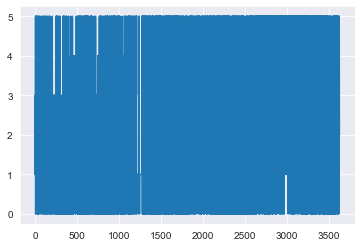

In [127]:
cluster_dict
plt.plot(cluster_dict)

In [128]:
newdf['cluster']=cluster_dict

In [130]:
newdf

,Id_Cliente,lat,lon,Total_Entrega,cluster
0,-1.731573,-0.075534,-0.509502,-0.566267,1
1,-1.730617,-1.458921,-0.709853,0.086772,3
2,-1.729662,0.628081,-1.062449,-0.566267,1
3,-1.728706,-0.577721,-0.296368,1.305777,2
4,-1.727751,0.709657,-0.674192,-0.566267,1
...,...,...,...,...,...
3620,1.727751,1.442802,0.905917,-0.000300,5
3621,1.728706,0.941944,0.734407,-0.566267,5
3622,1.729662,0.015337,1.396146,-0.392123,5
3623,1.730617,0.136575,0.797645,0.696274,2


In [129]:
newdf.to_csv(r'C:\Users\usuario\Documents\Hackathon\newdf.csv')

In [161]:
kproto = KPrototypes(n_clusters=6, verbose=2,max_iter=20)
clusters = kproto.fit_predict(newdf, categorical=[1])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 847, ncost: 136799073.42418253
Run: 1, iteration: 2/20, moves: 431, ncost: 121036262.59491411
Run: 1, iteration: 3/20, moves: 282, ncost: 114834133.02604543
Run: 1, iteration: 4/20, moves: 181, ncost: 112519850.25122233
Run: 1, iteration: 5/20, moves: 93, ncost: 111910571.12603341
Run: 1, iteration: 6/20, moves: 45, ncost: 111756567.67951836
Run: 1, iteration: 7/20, moves: 24, ncost: 111713784.53936628
Run: 1, iteration: 8/20, moves: 11, ncost: 111698992.6157876
Run: 1, iteration: 9/20, moves: 6, ncost: 111693332.94435768
Run: 1, iteration: 10/20, moves: 4, ncost: 111689153.56122312
Run: 1, iteration: 11/20, moves: 3, ncost: 111686755.71072079
Run: 1, iteration: 12/20, moves: 3, ncost: 111684910.42633045
Run: 1, iteration: 13/20, moves: 4, ncost: 111682756.28429864
Run: 1, iteration: 14/20, moves: 1, ncost: 111682184.45955694
Run: 1, iteration: 15/20, moves: 3, ncost: 1116810

In [162]:
print(kproto.cluster_centroids_)

[array([[ 2.72200000e+03,  1.02321725e+00,  8.65091211e+00,
         2.05183852e+01, -9.81920894e+01,  2.98507463e-02],
       [ 2.11900000e+03,  1.02653400e+00,  1.24170813e+01,
         2.04918528e+01, -9.81958875e+01,  9.83416252e-01],
       [ 1.51500000e+03,  1.02809917e+00,  1.08966942e+01,
         2.05104161e+01, -9.81914567e+01,  1.98016529e+00],
       [ 3.03500000e+02,  1.40264026e+00,  2.02164466e+01,
         2.05031286e+01, -9.81923986e+01,  4.00990099e+00],
       [ 9.09500000e+02,  1.05775578e+00,  1.69818482e+01,
         2.05120199e+01, -9.81918722e+01,  4.95049505e+00],
       [ 3.32450000e+03,  1.04318937e+00,  9.95985604e+00,
         2.05162271e+01, -9.81751484e+01,  3.00000000e+00]]), array([['A1'],
       ['A1'],
       ['A1'],
       ['A1'],
       ['A1'],
       ['A1']], dtype='<U2')]


In [156]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

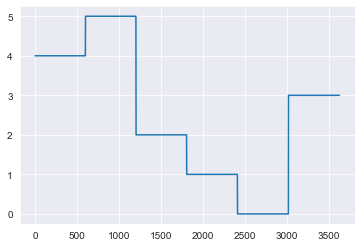

In [157]:
cluster_dict
plt.plot(cluster_dict)

In [158]:
brewing_df['cluster']=cluster_dict

In [163]:
brewing_df

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,cluster
0,1,A1,1,2.0,20.506052,-98.212377,4
1,2,A1,1,17.0,20.458128,-98.221248,4
2,3,A1,1,2.0,20.530427,-98.236860,4
3,4,A1,3,15.0,20.488655,-98.202940,4
4,5,A1,1,2.0,20.533253,-98.219669,4
...,...,...,...,...,...,...,...
3620,3621,A1,1,15.0,20.558651,-98.149706,3
3621,3622,A1,1,2.0,20.541300,-98.157300,3
3622,3623,A1,1,6.0,20.509200,-98.128000,3
3623,3624,A1,1,31.0,20.513400,-98.154500,3


In [171]:
brewing_df.to_csv(r'C:\Users\usuario\Documents\Hackathon\dias_cliente.csv', index = False)

In [172]:
brewing_df[brewing_df['cluster']== 0].head(5)

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,cluster
2410,2411,A1,1,4.0,20.482500,-98.175300,0
2411,2412,A1,1,2.0,20.459300,-98.166300,0
2412,2413,A1,1,2.0,20.514479,-98.264231,0
2413,2414,A1,1,4.0,20.482613,-98.176850,0
2414,2415,A1,1,4.0,20.491028,-98.139507,0


In [173]:
brewing_df[brewing_df['cluster']== 1].head(5)

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,cluster
1805,1806,A1,1,36.0,20.548845,-98.162240,1
1806,1807,A1,1,2.0,20.502945,-98.292845,1
1807,1808,A1,1,151.0,20.530504,-98.144063,1
1808,1809,A1,1,3.0,20.568191,-98.134477,1
1809,1810,A1,1,2.0,20.450515,-98.156608,1


In [174]:
brewing_df[brewing_df['cluster']== 2].head(5)

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,cluster
1202,1203,A1,1,7.0,20.563681,-98.127788,2
1203,1204,A1,1,1.0,20.469800,-98.179807,2
1204,1205,A1,1,2.0,20.544422,-98.213662,2
1205,1206,A1,1,5.0,20.559964,-98.208432,2
1206,1207,A1,1,1.0,20.559988,-98.138488,2


In [175]:
brewing_df[brewing_df['cluster']== 3].head(5)

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,cluster
3017,3018,A1,1,7.0,20.557345,-98.178479,3
3018,3019,A1,1,10.0,20.542800,-98.142900,3
3019,3020,A1,1,1.0,20.507537,-98.261705,3
3020,3021,A1,1,2.0,20.458100,-98.280000,3
3021,3022,A1,1,5.0,20.511885,-98.224175,3


In [176]:
brewing_df[brewing_df['cluster']== 4].head(5)

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,cluster
0,1,A1,1,2.0,20.506052,-98.212377,4
1,2,A1,1,17.0,20.458128,-98.221248,4
2,3,A1,1,2.0,20.530427,-98.236860,4
3,4,A1,3,15.0,20.488655,-98.202940,4
4,5,A1,1,2.0,20.533253,-98.219669,4


In [177]:
brewing_df[brewing_df['cluster']== 5].head(5)

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon,cluster
600,601,A1,1,2.0,20.471726,-98.232468,5
601,602,A1,1,26.0,20.500801,-98.181245,5
602,603,A1,1,15.0,20.546942,-98.139555,5
603,604,A1,1,4.0,20.522021,-98.228825,5
604,605,A1,1,2.0,20.445876,-98.173739,5


In [178]:
brewing_df_solo_cluster = brewing_df.drop(['id_Agencia','Frecuencia','Vol_Entrega','lat','lon'], axis=1)
brewing_df_solo_cluster

,Id_Cliente,cluster
0,1,4
1,2,4
2,3,4
3,4,4
4,5,4
...,...,...
3620,3621,3
3621,3622,3
3622,3623,3
3623,3624,3


In [180]:
brewing_df_solo_cluster

,Id_Cliente,cluster
0,1,4
1,2,4
2,3,4
3,4,4
4,5,4
...,...,...
3620,3621,3
3621,3622,3
3622,3623,3
3623,3624,3
